# A firstlook at reduced exoplanet transit data

This guide starts after data reduction and photometry have been performed, and you want to examine the resulting light curves, but without performing modeling just yet.

It it based on data that have been created through the AstroImageJ pipeline and is primarily useful for learning how to do the following things:
- Read in data (generalizable to other file extensions).
- Normalize your light curves by fitting a function to the baseline.
- Gaze lovingly at the detection of a planet passing in front of a faraway star.
- Save the normalized data in a more accessible format to be used later.

In [68]:
%matplotlib inline
import pandas
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.io import ascii
from astropy.table import Table, Column

Now that I have imported the relevant packages, I am going to open the data table (created by astroimagej) and plot it (with error)

# HAT-P-30b

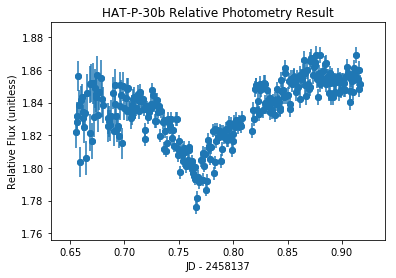

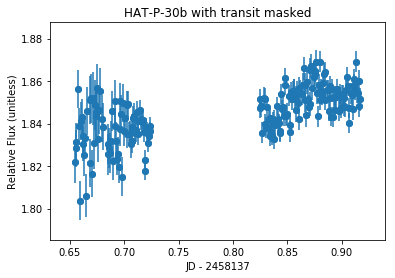

In [100]:
data = pandas.read_csv('/Users/willwaalkes/Desktop/Measurements_30b(csv).csv')
flux = data['rel_flux_T1']
JD = data['JD-OBS']
BJD = data['BJD-OBS']
error = data['rel_flux_err_T1']
date = JD - 2458137.0

plt.figure()
plt.scatter(date,flux)
plt.errorbar(date,flux,yerr=error,fmt='o')
plt.title('HAT-P-30b Relative Photometry Result')
plt.xlabel('JD - 2458137')
plt.ylabel('Relative Flux (unitless)')
plt.show()

low = 0.725
high = low + 0.1
mask = np.where(np.logical_not((date >= low)& (date <= high)))[0]

plt.figure()
plt.scatter(date[mask],flux[mask])
plt.errorbar(date[mask],flux[mask],yerr=error[mask],fmt='o')
plt.title('HAT-P-30b with transit masked')
plt.xlabel('JD - 2458137')
plt.ylabel('Relative Flux (unitless)')
plt.show()

Next, I'll fit a line to the baseline, to normalize our data and eliminate the need to fit the baseline during BATMAN modeling.

('Polynomial parameters:', array([ 1.77831754,  0.08370177]))


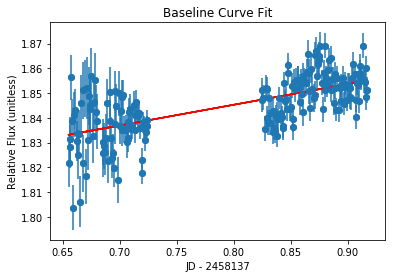

In [101]:
def f_x(x,a,b):
    return a + b*x

popt, pcov = curve_fit(f_x,date[mask],flux[mask])

print("Polynomial parameters:",popt)

poly = f_x(date[mask], *popt)

baseline_fit = f_x(date, *popt)

plt.plot(date[mask],poly,color='green',label='Power-Law')
plt.plot(date,baseline_fit,color='red')
plt.scatter(date[mask],flux[mask])
plt.errorbar(date[mask],flux[mask],yerr=error[mask],fmt='o')
plt.title('Baseline Curve Fit')
plt.xlabel('JD - 2458137')
plt.ylabel('Relative Flux (unitless)')
plt.show()

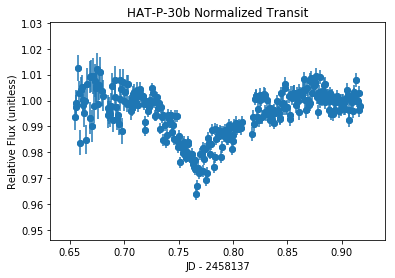

In [102]:
normed_flux = flux/baseline_fit
normed_err = error/baseline_fit

plt.scatter(date,normed_flux)
plt.errorbar(date,normed_flux,yerr=normed_err,fmt='o')
plt.xlabel('Hours')
plt.ylabel('Normalized Flux')
plt.title('HAT-P-30b Normalized Transit')
plt.xlabel('JD - 2458137')
plt.ylabel('Relative Flux (unitless)')
plt.show()

#Save the data to a smaller file, for use later
dat = Table([normed_flux,normed_err,JD,BJD], names=['Flux','error','JD','BJD'])
ascii.write(dat,'HAT-P-30b_lightcurve.txt',overwrite=True)

Now I am going to do the same thing for HAT-P-9b and HAT-P-25b

# HAT-P-9b

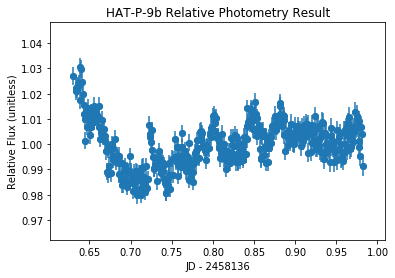

In [110]:
data = pandas.read_csv('/Users/willwaalkes/Desktop/Measurements_HAT-P-9b.csv')
flux = data['rel_flux_T1']
JD = data['JD-OBS']
BJD = data['BJD-OBS']
error = data['rel_flux_err_T1']
date = JD - 2458136.0

normed_flux = flux/np.median(flux)
normed_err = error/np.median(flux)

plt.figure()
plt.scatter(date,normed_flux)
plt.errorbar(date,normed_flux,yerr=normed_err,fmt='o')
plt.title('HAT-P-9b Relative Photometry Result')
plt.xlabel('JD - 2458136')
plt.ylabel('Relative Flux (unitless)')
plt.show()

#Save the data to a smaller file, for use later
dat = Table([normed_flux,normed_err,JD,BJD], names=['Flux','error','JD','BJD'])
ascii.write(dat,'/Users/willwaalkes/Desktop/HAT-P-9b_lightcurve.txt',overwrite=True)

That didn't look great, so let's move to HAT-P-25b:

# HAT-P-25b

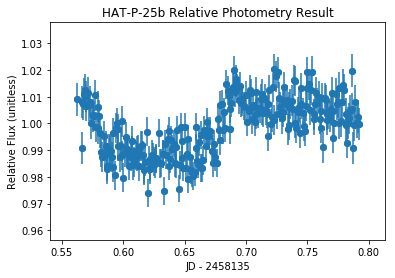

In [104]:
data = pandas.read_csv('/Users/willwaalkes/Desktop/Measurements_25b.csv')
flux = data['rel_flux_T1']
JD = data['JD-OBS']
BJD = data['BJD-OBS']
error = data['rel_flux_err_T1']
date = JD - 2458135.0
flux = np.array(flux)

i = 264
flux = np.delete(flux,i)
date = np.delete(np.array(date),i)
JD = np.delete(np.array(JD),i)
BJD = np.delete(np.array(BJD),i)
error = np.delete(np.array(error),i)

plt.figure()
plt.scatter(date,flux/np.median(flux))
plt.errorbar(date,flux/np.median(flux),yerr=error/np.median(flux),fmt='o')
plt.title('HAT-P-25b Relative Photometry Result')
plt.xlabel('JD - 2458135')
plt.ylabel('Relative Flux (unitless)')
plt.show()

WOW! Let's fit this baseline, and save the data to a text file for use with BATMAN

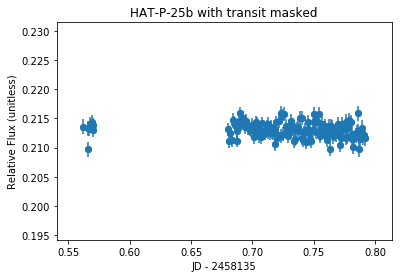

('Polynomial parameters:', array([ 0.21584241, -0.00386407]))


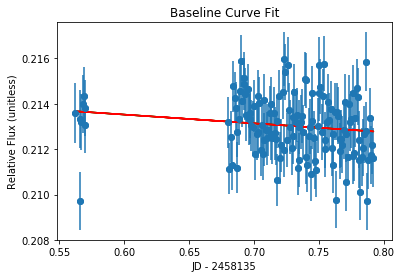

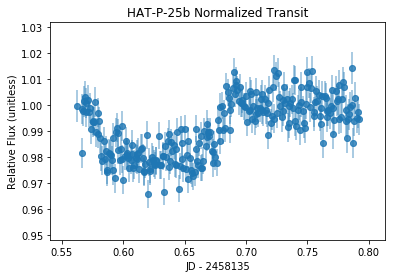

In [108]:
low = 0.57
high = 0.68
mask = np.where(np.logical_not((date >= low)& (date <= high)))[0]

plt.figure()
plt.scatter(date[mask],flux[mask])
plt.errorbar(date[mask],flux[mask],yerr=error[mask],fmt='o')
plt.title('HAT-P-25b with transit masked')
plt.xlabel('JD - 2458135')
plt.ylabel('Relative Flux (unitless)')
plt.show()

def f_x(x,a,b):
    return a + b*x

popt, pcov = curve_fit(f_x,date[mask],flux[mask])

print("Polynomial parameters:",popt)

poly = f_x(date[mask], *popt)

baseline_fit = f_x(date, *popt)

plt.plot(date[mask],poly,color='green',label='Power-Law')
plt.plot(date,baseline_fit,color='red')
plt.scatter(date[mask],flux[mask])
plt.errorbar(date[mask],flux[mask],yerr=error[mask],fmt='o')
plt.title('Baseline Curve Fit')
plt.xlabel('JD - 2458135')
plt.ylabel('Relative Flux (unitless)')
plt.show()

normed_flux = flux/baseline_fit
normed_err = error/baseline_fit

plt.scatter(date,normed_flux,alpha=0.6)
plt.errorbar(date,normed_flux,yerr=normed_err,fmt='o',alpha=0.5)
plt.xlabel('Hours')
plt.ylabel('Normalized Flux')
plt.title('HAT-P-25b Normalized Transit')
plt.xlabel('JD - 2458135')
plt.ylabel('Relative Flux (unitless)')
plt.show()

#Save the data to a smaller file, for use later
dat = Table([normed_flux,normed_err,JD,BJD], names=['Flux','error','JD','BJD'])
ascii.write(dat,'HAT-P-25b_lightcurve.txt',overwrite=True)